# East Passyunk Access Index

### Settings

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, Polygon
import osmnx as ox
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import os
import contextily as cx

In [6]:


# === Folder structure ===
folders = [
    "data/raw",
    "data/processed",
    "data/external",
    "outputs/figures",
    "outputs/tables",
    "outputs/dashboards",
    "notebooks",
    "scripts",
    "docs"
]

for f in folders:
    os.makedirs(f, exist_ok=True)

# === Core files ===
readme = """# East Passyunk Character Map

## Overview
The *East Passyunk Character Map* project aims to visualize and quantify neighborhood characteristics in East Passyunk, Philadelphia — focusing on accessibility, land use, green space, transit access, and socio-demographic context.

### Objectives
- Develop an **Accessibility Index** combining infrastructure and mobility data.
- Visualize **land use patterns** and **amenity clusters**.
- Incorporate **NDVI** and **green space access** metrics.
- Compare results within East Passyunk and, if feasible, citywide.

### Core Data Sources
- **OpenStreetMap (via OSMnx)** – streets, intersections, land use
- **OpenDataPhilly** – business licenses, zoning, crash data
- **ACS Census (via Census API)** – demographics, age, commute
- **DVRPC Sidewalk Gaps / Ramp data (API)** – accessibility metrics

### Project Components
1. **Data Collection & Cleaning**
2. **Accessibility Index Development**
3. **Geospatial Joins and Analysis**
4. **Visualization and Mapping**
5. **Interactive Dashboard Deployment**

---

## Folder Structure
"""


In [2]:
# --- Settings ---
pd.set_option("display.max_columns", None)
plt.style.use("seaborn-v0_8-whitegrid")

# --- Paths ---
DATA_DIR = "data/"
OUTPUT_DIR = "outputs/"
os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(OUTPUT_DIR, exist_ok=True)

## 1. Define the study area boundary

In [3]:
# Load boundary
boundary_path = os.path.join(DATA_DIR, "Zoning_RCO.geojson")
epx_boundary = gpd.read_file(boundary_path)

#filter to East Passyunk
epx_boundary = epx_boundary[epx_boundary["organization_name"] == "East Passyunk Crossing Civic Association (EPX)"].to_crs(epsg=3857)

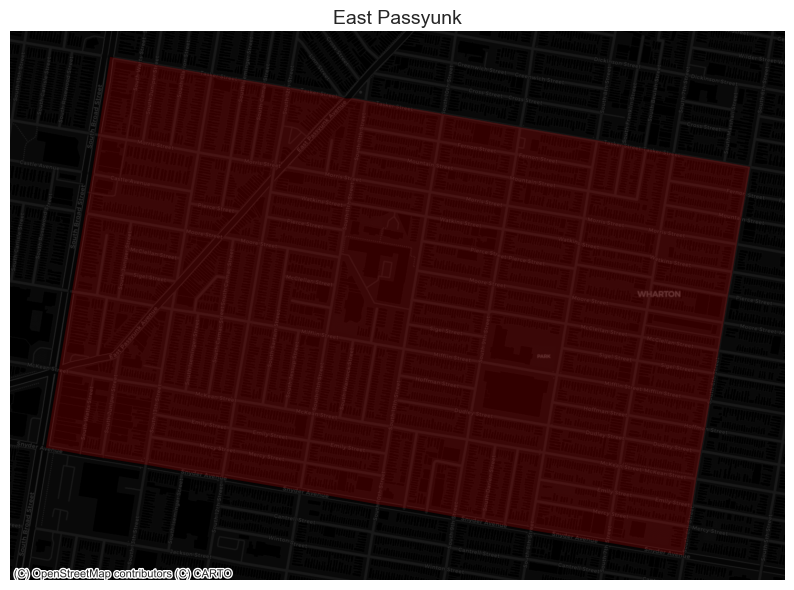

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
epx_boundary.plot(ax=ax, color="red", alpha = .2, linewidth=.7, edgecolor="black")

# Add light gray basemap (same as ArcGIS "Light Gray Canvas")
cx.add_basemap(ax, source=cx.providers.CartoDB.DarkMatter)
# alternatively: cx.providers.Esri.DeLorme (for a lighter tone)

ax.set_axis_off()
plt.title("East Passyunk", fontsize=14)
plt.show()


<Axes: >

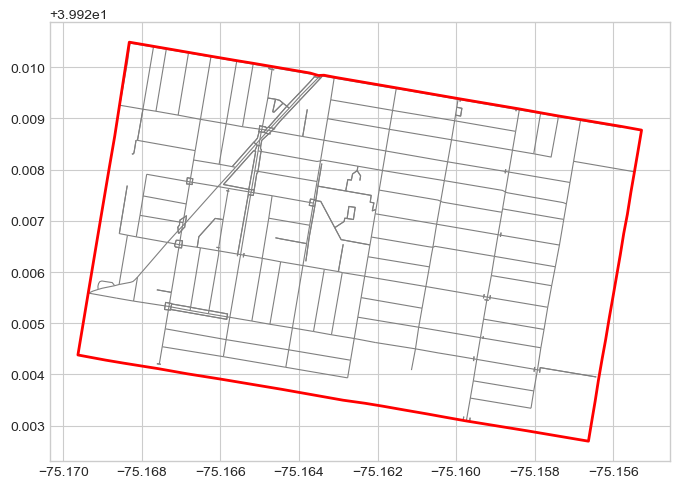

In [12]:
# Create a road network (Graph)
G = ox.graph_from_polygon(epx_boundary.geometry.iloc[0], network_type="all")

# Convert to GeoDataFrames
nodes, edges = ox.graph_to_gdfs(G)

# Quick map preview
ax = edges.plot(figsize=(8,8), linewidth=0.8, color="gray")
epx_boundary.boundary.plot(ax=ax, edgecolor="red", linewidth=2)
